In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable, functional
import torch.optim as optim
from torch.utils.data import Dataset, dataloader
from torchsummary import summary

import sys
sys.path.append('../src')
from model import *
from datagen import *

Running on CPU


In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on GPU: ", device)
else:
    device = torch.device("cpu")
    print("Running on CPU")

torch.set_default_device(device)
# torch.cuda.synchronize()

Running on CPU


## Dataset

This isnt actually in use, just to test datagen code. The datagen function is directly coded in training method in model.

In [3]:
# Dataclass for adding problem

class Datamodel(Dataset):
    def __init__(self,time_pos_points,labels):
        self.x = time_pos_points
        self.y = labels
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [4]:
n_data = 2000
t_steps = 40

# data,labels = datagen_full_sum_normal(n_data,t_steps,normalize=True)
data,labels = datagen_circular_pm(n_data,t_steps)
# data,labels = datagen_timewise_labels(n_data,t_steps,2)
# print(data[1],labels[1])

BATCH_SIZE = 64 # NOT IN USE FOR TRAINING

training_data = Datamodel(data,labels)
training_loader = torch.utils.data.DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)

data.shape

torch.Size([2000, 40, 1])

In [5]:
k = 15

print(labels[k])
print(data[k])

tensor([3.0074, 1.8197, 1.7430, 3.1142, 2.6081, 3.2622, 3.8485, 4.5468, 5.1309,
        4.6241, 5.3071, 4.9249, 4.1416, 4.4106, 3.9241, 4.1573, 3.8636, 3.1988,
        3.0033, 1.4853, 3.1791, 2.9199, 2.9507, 2.9339, 2.2767, 2.6001, 2.3359,
        2.7078, 3.2754, 3.1699, 3.8488, 3.0034, 3.4577, 2.9198, 3.0444, 2.1460,
        1.6698, 1.9933, 2.2800, 1.5502])
tensor([[-0.0214],
        [-0.1890],
        [-0.0122],
        [ 0.2182],
        [-0.0805],
        [ 0.1041],
        [ 0.0933],
        [ 0.1112],
        [ 0.0930],
        [-0.0807],
        [ 0.1087],
        [-0.0608],
        [-0.1247],
        [ 0.0428],
        [-0.0774],
        [ 0.0371],
        [-0.0467],
        [-0.1058],
        [-0.0311],
        [-0.2416],
        [ 0.2696],
        [-0.0412],
        [ 0.0049],
        [-0.0027],
        [-0.1046],
        [ 0.0515],
        [-0.0420],
        [ 0.0592],
        [ 0.0903],
        [-0.0168],
        [ 0.1080],
        [-0.1346],
        [ 0.0723],
        [-0.

## Model training

In [47]:
hidden_size = 128
input_size = 1
nav_size = 1

train1 = True

if train1:
    # model1 = RNN_circular_ND_pm(input_size,t_steps,output_size,hidden_size,lr=0.0001,w_decay=0.000,act_decay=0.01,irnn=True,outputnn=False,Wx_normalize=False,activation=True,rotation_init=False,bias=False)
    # model1 = RNN_circular_LowEtAl_bridged_reduced(input_size,hidden_size,lr=0.0001,irnn=True,outputnn=False,Wx_normalize=False,activation=True,bias=False,nav_space=1,batch_size=64,time_back=2).to(device)
    model1 = RNN_circular_LowEtAl_bridged(input_size,hidden_size,lr=0.0001,irnn=True,outputnn=False,Wx_normalize=False,activation=True,bias=False,nav_space=1,batch_size=64).to(device)
    # model1 = RNN_circular_LowEtAl(input_size,hidden_size,lr=0.0001,irnn=True,outputnn=True,Wx_normalize=False,activation=True,bias=True,nav_space=1,batch_size=64).to(device)
    # print("Guess on the first 15 training data: ", model1(data[0:15]))

    model1.load_state_dict(torch.load("../trained models/LowEtAl_bridged_reduced_Gradual_lossiequaloroverj_maskonangle_lossscale_4000gradual.pt"))

    # _ = model1.train(epochs=1)
    # _ = model1.train_gradual(epochs=4000)
    # model1.plot_losses(average=30)
    # model1.plot_accs()
    print("Guess on the first 15 training data: ", model1(data[0:15]))
    # print("Weight of the hidden layer: ",model2.rnn.weight_hh_l0, " Weight of the input layer: ",model2.rnn.weight_ih_l0)

Guess on the first 15 training data:  tensor([[[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[1.0062, 0.0000, 0.0000,  ..., 0.0000, 0.0462, 0.0276],
         [0.9995, 0.0000, 0.0013,  ..., 0.0000, 0.0206, 0.0136],
         [0.9894, 0.0117, 0.0371,  ..., 0.0229, 0.0000, 0.0000],
         ...,
         [0.9919, 0.0082, 0.0283,  ..., 0.0136, 0.0000, 0.0000],
         [0.9849, 0.0182, 0.0531,  ..., 0.0397, 0.0000, 0.0000],
         [0.9737, 0.0343, 0.0930,  ..., 0.0818, 0.0000, 0.0000]],

        [[0.9628, 0.0000, 0.0000,  ..., 0.0000, 0.0449, 0.0489],
         [0.9893, 0.0000, 0.0000,  ..., 0.0000, 0.0436, 0.0399],
         [0.9694, 0.

100%|██████████| 2000/2000 [03:18<00:00, 10.05it/s]


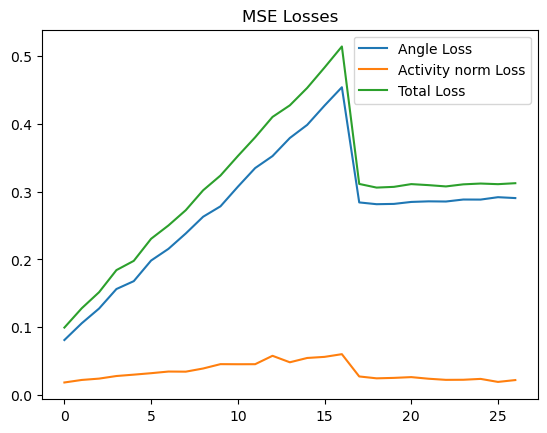

In [42]:
model1.base_training_tsteps = 50

_ = model1.train(epochs=2000)
# model1.plot_losses(average=30)
model1.plot_losses(average=30)

In [34]:
# torch.save(model1.state_dict(), "../trained models/LowEtAl_bridged_reduced_Gradual_lossiequaloroverj_maskonangle_lossscale_4000gradual.pt")

torch.Size([41, 15])


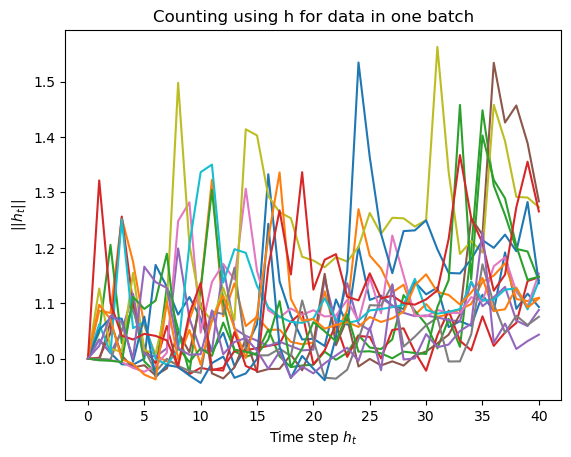

In [7]:
print(model1.hts.norm(dim=2).shape)
htss = model1.hts.norm(dim=2)
plt.plot(htss.cpu().detach().numpy())
plt.title("Counting using h for data in one batch")
plt.xlabel(r"Time step $h_t$")
plt.ylabel(r"$||h_t||$")
plt.show()

torch.Size([41, 15, 128])


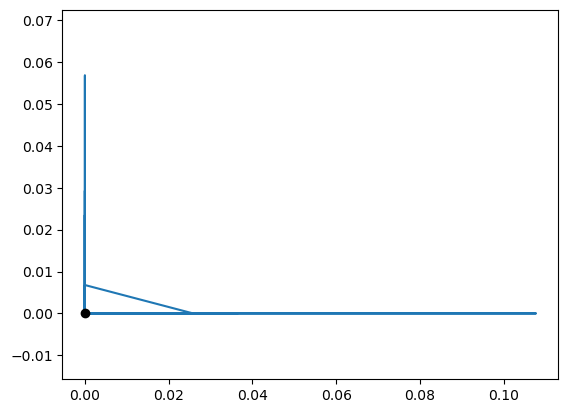

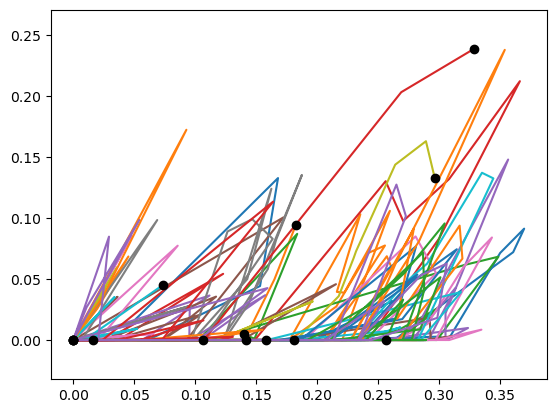

In [14]:
n = 0
print(model1.hts.shape)
model1.hts[:,n,:].shape
hts_cric = model1.hts.cpu().detach().numpy()
plt.plot(hts_cric[:,n,90],hts_cric[:,n,76],"-")
plt.plot(hts_cric[-1,n,90],hts_cric[-1,n,76],"o",color="black")
plt.axis("equal")
plt.show()
plt.plot(hts_cric[:,:,16],hts_cric[:,:,125],"-")
plt.plot(hts_cric[-1,:,16],hts_cric[-1,:,125],"o",color="black")
plt.axis("equal")
plt.show()

In [ ]:
# See what dimension has the highest values

maxs = []

for i in range(128):
    maxs.append(max(hts_cric[:,n,i]))

# Sorted dimension from lowest to highest value in that dimension
print(torch.argsort(torch.tensor(maxs),dim=-1))

tensor([ 16,  95,  40,  25,  26,  92,  28,  67,  11, 121, 119, 118,  15,  32,
         17,  18,  47,  64, 117, 115,   9,  70,  29,  80, 127, 109, 112,  34,
         31,  39,  97,  62, 102, 114,   8,  69,  72,  30, 101, 107,  52,  66,
         14,  79,  24,  50, 111,  81,  74,  84,   3, 124,  86, 116, 106, 123,
         53,  94,  23,  37, 126,  43,  65,  42,  46,  54,  60, 122,  13,  44,
         56, 100,  91, 104,  59,  41,  49, 105,  51,   1,  61,  83,  48,  10,
         35,  12,  88,   4,  20,  98,  68,  78,  93,  73,   6,  77,  85,  58,
         33,  99,  55,  38,  21,  36,  27,  82,  45, 113,   5,  75,   7, 103,
         89,  76,   2,  22,  90, 125, 110, 120,  19,  87,  96, 108,  71,  63,
         57,   0])


(39, 5000)
(39, 5000)


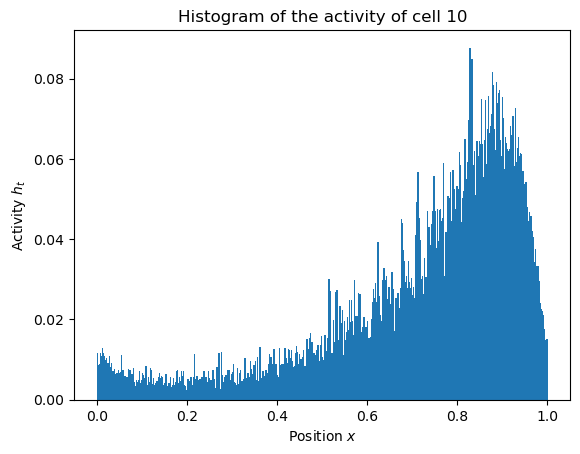

100%|██████████| 128/128 [00:03<00:00, 33.12it/s]


In [48]:
t_test = 40

# data,labels = datagen_circular_pm(5000,t_test,sigma=0.05,bound=0.5)
data, _, labels = datagen_lowetal(5000,t_test)

test_batch_size = 5000

# xs = data[0:test_batch_size]
xs = labels[0:test_batch_size,:-1]/(2*np.pi)
xs = xs.cpu().detach().numpy().T
print(xs.shape)

# Get the hidden states for the test data
hts = model1(data[0:test_batch_size],raw=True)
# print(hts.shape)

# Grid-cell histogram

hts = hts.cpu().detach().numpy() # Shape [t_steps, batch_size, hidden_size] = [21, 64, 128]

k = 10 # What cell to see the histogram of

hts_k = abs(hts[1:-1,:,k])
print(hts_k.shape)

bins = 2000

import scipy.stats as stats

bin_means, bin_edges, binnumber = stats.binned_statistic(xs.flatten(),hts_k.flatten(),statistic='mean',bins=bins)
# Bar plot of the histogram
plt.bar(bin_edges[:-1],bin_means,width=6/bins)
plt.title("Histogram of the activity of cell "+str(k))
plt.xlabel(r"Position $x$")
plt.ylabel(r"Activity $h_t$")
plt.show()

# print(hts.shape)

# fig, ax = plt.subplots(32,4,subplot_kw={'projection': 'polar'})
# fig.set_size_inches(15, 80)
# fig.subplots_adjust(hspace=1,wspace=0.2)

activity = np.zeros((128,bins))

for k in tqdm(range(128)):
    # k = 103 # What cell to see the histogram of
    hts_k = abs(hts[1:-1,:,k])
    # print(hts_k.shape)

    # Bins equally spaced from 0 to 1 in time_steps amount of bins
    bin_means, bin_edges, binnumber = stats.binned_statistic(xs.flatten(),hts_k.flatten(),statistic='mean',bins=bins)
    activity[k,:] = bin_means
    np.nan_to_num(activity,copy=False)
    # Bar plot of the histogram
    # ax[k//4,k%4].bar(bin_edges[:-1]*2*np.pi,bin_means,width=6/bins)
    # # ax[].bar(bin_edges[:-1]*2*np.pi,bin_means,width=6/bins)
    # ax[k//4,k%4].set_title("Cell "+str(k))
    # Adjust space between subplots

# plt.show()

c:\Users\matti\anaconda3\envs\torch2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(2000, 2)


Text(0.5, 1.0, 'UMAP projection of the activity of the grid cells')

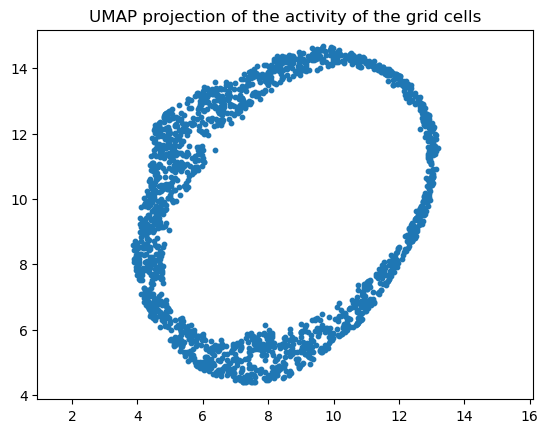

In [9]:
import umap

# draw_umap(activity.T,n_components=2, title='UMAP projection of the activity of the grid cells')
reducer = umap.UMAP(n_neighbors=500, n_components=2)
reducer.fit(activity.T)
embedding = reducer.transform(activity.T)

print(embedding.shape)


plt.scatter(embedding[:, 0], embedding[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the activity of the grid cells', fontsize=12)


(2000, 128)
(2000, 2)


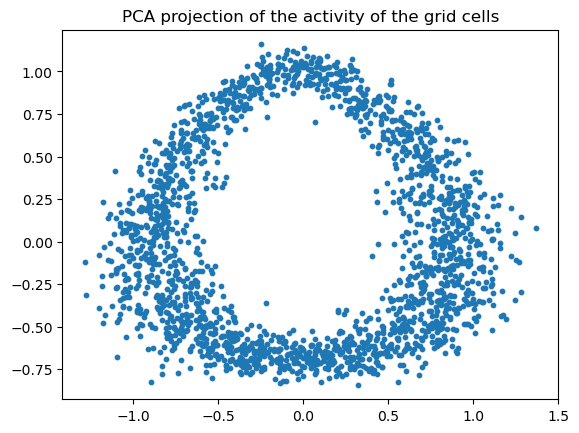

In [49]:
# PCA projection of the activity of the grid cells
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(activity.T)
embedding = pca.transform(activity.T)

print(activity.T.shape)

print(embedding.shape)


plt.scatter(embedding[:, 0], embedding[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection of the activity of the grid cells', fontsize=12)

plt.show()

In [11]:
# PCA projection of the activity of the grid cells in 3D

pca3D = PCA(n_components=3)
pca3D.fit(activity.T)

embedding = pca3D.transform(activity.T)

print(embedding.shape)

# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], s=10)
# ax.set_aspect('equal', 'datalim')
# plt.title('PCA projection of the activity of the grid cells', fontsize=12)

# plt.show()

# Make interactive 3D plot for notebook
import plotly.express as px
fig = px.scatter_3d(embedding, x=0, y=1, z=2)
fig.show()

(2000, 3)


In [ ]:
print(model1(data[10:11]))
print(data[10:11])
print(labels[10:11])

tensor([[[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.9617, 0.0191, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.7752, 0.2787, 0.1918,  ..., 0.0000, 0.0000, 0.0000]],

        ...,

        [[0.0000, 0.1010, 0.0000,  ..., 1.3201, 0.0000, 0.0000]],

        [[0.0000, 0.0521, 0.0000,  ..., 1.3438, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 1.4385, 0.0000, 0.0000]]],
       grad_fn=<CopySlices>)
tensor([[[-0.0593],
         [-0.5011],
         [ 0.0175],
         [ 0.3886],
         [-0.1160],
         [-0.1112],
         [-0.3514],
         [ 0.2696],
         [ 0.5907],
         [ 0.0116],
         [ 0.1795],
         [-0.0454],
         [ 0.1277],
         [ 0.0009],
         [ 0.0799],
         [-0.0991],
         [-0.0829],
         [ 0.4895],
         [ 0.1560],
         [ 0.5165],
         [ 0.5413],
         [ 0.2738],
         [-0.0019],
         [ 0.4944],
         [-0.4865],
         [-0.1109],
         [ 0.1606],
         [ 0.13

(40,)


(-1.0981562435626984,
 1.0996222794055939,
 -1.0991054385900498,
 1.0853120297193528)

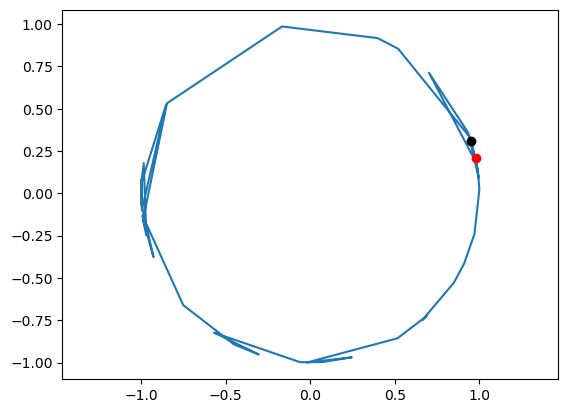

In [16]:
t_test = 40

# data,labels = datagen_circular_pm(1000,t_test,sigma=0.1,bound=0.5)
# data,labels, _ = datagen_lowetal(1000,t_test)
data,_, labels = datagen_lowetal(1000,t_test)


# Plot circle from data
data_raw = labels[122].cpu().detach().numpy()
print(data_raw.shape)
# print(data_raw)
data_points = np.zeros((t_test,2))
for i in range(t_test):
    data_points[i,0] = np.cos(data_raw[i])
    data_points[i,1] = np.sin(data_raw[i])
    # data_points[i,0] = data_raw[i,0]
    # data_points[i,1] = data_raw[i,1]


plt.plot(data_points[:,0],data_points[:,1],"-")
plt.plot(data_points[-1,0],data_points[-1,1],"o",color="black")
plt.plot(data_points[0,0],data_points[0,1],"o",color="red")
plt.axis("equal")

Mean model error:  0.11514242077670156


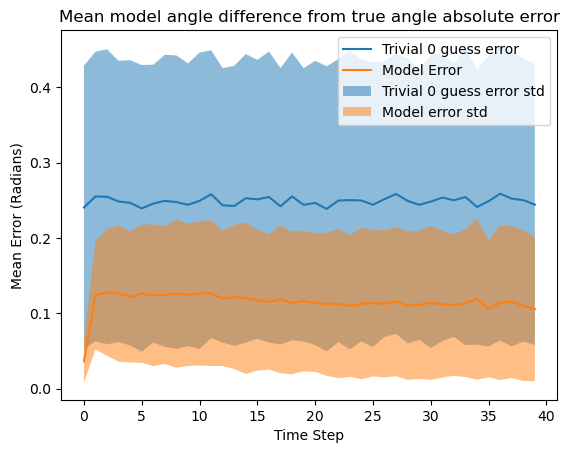

In [51]:
# PCA Accuracy test

t_test = 40

test_batch_size = 1000

data,labels = datagen_circular_pm(test_batch_size,t_test,sigma=0.05,bound=0.5)
# data,_, labels = datagen_lowetal(1000,t_test)


y_hat = model1(data[0:test_batch_size],raw=True)
y_hat = y_hat.permute(1,0,2)
y_hat = y_hat.cpu().detach().numpy()
# print(y_hat.shape)

y_hat_pca = np.zeros((test_batch_size,t_test+1,2))
for i in range(test_batch_size):
     y_hat_pca[i,:,:] = pca.transform(y_hat[i,:,:])
#      y_hat_pca[i,:,:] = reducer.transform(y_hat[i,:,:])

h0 = pca.transform(y_hat[0,0:1])
# print(h0)
y_hat = y_hat_pca
# print(y_hat_pca)

# plt.plot(h0[0,0],h0[0,1],"o",color="red")
# plt.plot(y_hat_pca[:,0],y_hat_pca[:,1],"-")

y = labels[0:test_batch_size]
y = y.cpu().detach().numpy()
# print(y.shape)
# Concatenate pi to the start of y to represent starting angle
y = np.concatenate((np.ones((test_batch_size,1))*np.pi,y),axis=-1)
# y = torch.cat((torch.ones(1,test_batch_size)*np.pi,y))
# print(y[0])

# print(y_hat.shape)
# print(y.shape)
 
err = np.zeros((test_batch_size,t_test))
angs = np.zeros((test_batch_size,t_test))
base_guess = np.zeros((test_batch_size,t_test))

dy = np.zeros((test_batch_size,t_test))
# for i in range(len(y)):
#     for j in range(1,t_test):
        # dy[i,j] = np.abs(y[i,j]-y[i,j-1])

for j in range(test_batch_size):
    for i in range(1,t_test+1):
        y_hat_i_normalized = y_hat[j,i]/np.linalg.norm(y_hat[j,i])
        y_hat_i_minus_1_normalized = y_hat[j,i-1]/np.linalg.norm(y_hat[j,i-1])
        # print(y_hat_i_normalized @ y_hat_i_minus_1_normalized)

        # Angle between y_hat[j,i] and y_hat[j,i-1]
        ang = np.arccos(y_hat_i_normalized @ y_hat_i_minus_1_normalized)
        # Use cross product to determine direction/sign of angle change
        angle_direction = np.sign(np.cross(y_hat_i_normalized,y_hat_i_minus_1_normalized))
        # print(np.rad2deg(ang))

        # !! IF ACCURACY IS BAD, TRY CHANGING THE SIGN OF THE ANGLE !!
        angs[j,i-1] = -ang*angle_direction
        # err[j,i-1] = np.abs(ang - np.abs(y[j,i]-y[j,i-1]))
        # dy[j,i-1] = np.abs(y[j,i]-y[j,i-1])
        
        # Angle differance from labels
        dy[j,i-1] = y[j,i]-y[j,i-1]


# For some reason multiplying by pi/2 gives the best results
angs = angs*2*np.pi
# print(angs[0])
# print(dy[0])
err = np.abs(angs - dy)
err_mean = np.mean(err,axis=0)
err_mean_std = np.std(err,axis=0)
angs_mean = np.mean(angs,axis=0)
dy_mean_nonabs = np.mean(dy,axis=0)
dy_mean = np.mean(np.abs(dy-0),axis=0)
dy_mean_std = np.std(np.abs(dy-0),axis=0)
# trivial_mean_error = np.mean(np.abs(dy - dy_mean),axis=0)
plt.plot(dy_mean,label="Trivial 0 guess error")
plt.plot(err_mean,label="Model Error")
plt.fill_between(np.arange(t_test),dy_mean-dy_mean_std,dy_mean+dy_mean_std,alpha=0.5, label="Trivial 0 guess error std")
plt.fill_between(np.arange(t_test),err_mean-err_mean_std,err_mean+err_mean_std,alpha=0.5, label="Model error std")

# plt.plot(trivial_mean_error,label="Trivial mean guess error")

# Plot this to see what the difference is explicitly
# plt.plot(dy_mean_nonabs,label="True Angle")
# plt.plot(angs_mean,label="Model Angle")
plt.legend()
# print(angs[0])
# print(dy[0])
# plt.plot(err)
plt.title("Mean model angle difference from true angle absolute error")
plt.xlabel("Time Step")
plt.ylabel("Mean Error (Radians)")
# plt.ylim(0,max(max(err_mean),max(dy_mean))*1.1)
print("Mean model error: ", np.mean(err_mean))
labels = labels.cpu().detach().numpy()

In [179]:
dy.shape

(1000, 40)

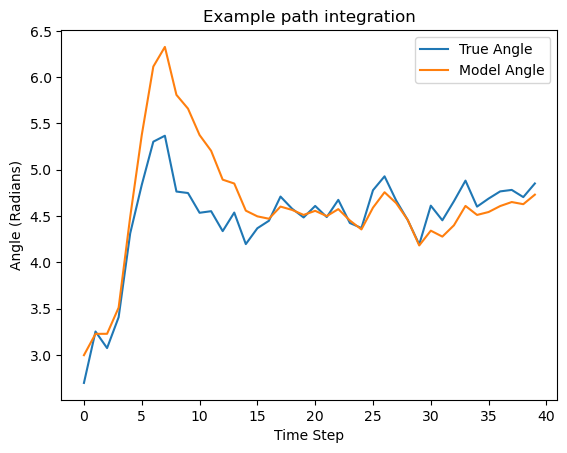

In [56]:
test_path = 11


# Angles of y_hat to x-axis
angs = np.arctan2(y_hat[:,:,1],y_hat[:,:,0])[:,1:]
angs_scaled = angs*2*np.pi - 7
plt.plot(labels[test_path], label="True Angle")
plt.plot(angs_scaled[test_path], label="Model Angle")
# plt.ylim(0,2*np.pi)
plt.title("Example path integration")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Angle (Radians)")
plt.show()


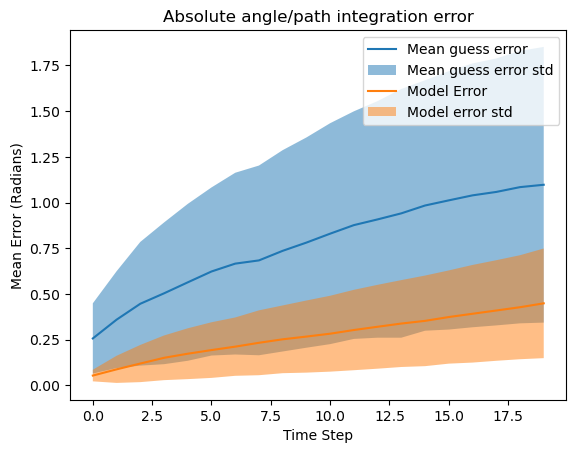

In [40]:
mean_guess_err = np.mean(np.abs(labels - np.mean(labels)),axis=0)
mean_guess_std = np.std(np.abs(labels - np.mean(labels)),axis=0)
plt.plot(mean_guess_err,label="Mean guess error")
plt.fill_between(np.arange(t_test),mean_guess_err-mean_guess_std,mean_guess_err+mean_guess_std,alpha=0.5, label="Mean guess error std")
plt.title("Absolute angle/path integration error")

err2 = np.abs(angs_scaled - labels)
err2_mean = np.mean(err2,axis=0)
err2_mean_std = np.std(err2,axis=0)
plt.plot(err2_mean,label="Model Error")
plt.fill_between(np.arange(t_test),err2_mean-err2_mean_std,err2_mean+err2_mean_std,alpha=0.5, label="Model error std")


plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Mean Error (Radians)")
plt.show()

In [14]:
# # Accuracy test, note we cannot find negative angles, such that we have to trust that the model has the right sign

# t_test = 40

# data,labels = datagen_circular_pm(1000,t_test,sigma=0.1,bound=0.5)
# # data,_, labels = datagen_lowetal(1000,t_test)

# test_batch_size = 1000

# y_hat = model1(data[0:test_batch_size],raw=True)
# y_hat = y_hat.cpu().detach().numpy()
# y_hat = y_hat.transpose(1,0,2)

# y = labels[0:test_batch_size]
# y = y.cpu().detach().numpy()
# # print(y.shape)
# # Concatenate pi to the start of y
# y = np.concatenate((np.ones((test_batch_size,1))*np.pi,y),axis=-1)
# # y = torch.cat((torch.ones(1,test_batch_size)*np.pi,y))

# print(y_hat.shape)
# # print(y.shape)
 
# err = np.zeros((test_batch_size,t_test))
# angs = np.zeros((test_batch_size,t_test))
# base_guess = np.zeros((test_batch_size,t_test))

# dy = np.zeros((test_batch_size,t_test))
# # for i in range(len(y)):
# #     for j in range(1,t_test):
#         # dy[i,j] = np.abs(y[i,j]-y[i,j-1])

# for j in range(test_batch_size):
#     for i in range(1,t_test+1):
#         y_hat_i_normalized = y_hat[j,i]/np.linalg.norm(y_hat[j,i])
#         y_hat_i_minus_1_normalized = y_hat[j,i-1]/np.linalg.norm(y_hat[j,i-1])
#         # print(y_hat_i_normalized @ y_hat_i_minus_1_normalized)
#         # Angle between y_hat[j,i] and y_hat[j,i-1]
#         ang = np.arccos(y_hat_i_normalized @ y_hat_i_minus_1_normalized)
#         # print(np.rad2deg(ang))
#         angs[j,i-1] = ang
#         # err[j,i-1] = np.abs(ang - np.abs(y[j,i]-y[j,i-1]))
#         dy[j,i-1] = np.abs(y[j,i]-y[j,i-1])

# # err = np.abs(angs - dy)
# # For some reason multiplying by pi/2 gives the best results
# angs = angs*np.pi/2
# err = np.abs(angs - dy)
# err_mean = np.mean(err,axis=0)
# angs_mean = np.mean(angs,axis=0)
# dy_mean = np.mean(dy,axis=0)
# trivial_mean_error = np.mean(np.abs(dy - dy_mean),axis=0)
# plt.plot(dy_mean,label="Trivial 0 guess error")
# plt.plot(trivial_mean_error,label="Trivial mean guess error")
# plt.plot(err_mean,label="Model Error")
# # plt.plot(angs_mean*(np.pi/2),label="Model Angle")
# # plt.plot(dy_mean,label="True Angle")
# plt.legend()
# # print(angs[0])
# # print(dy[0])
# # plt.plot(err)
# print(np.mean(err_mean))

In [ ]:
np.mean(dy_mean)

0.4893699909355228

In [ ]:
# print(model1.input.weight)
print(model1.hidden.weight)
# print(model1.Wh_init)
# print(model1.output.weight)

Parameter containing:
tensor([[ 9.7316e-01, -2.3343e-02, -2.1827e-02,  ..., -1.0315e-02,
         -2.2785e-02, -2.1353e-02],
        [-1.0513e-02,  9.9223e-01, -6.7781e-03,  ...,  1.1700e-02,
          2.7143e-03, -9.6948e-04],
        [-3.3636e-02, -2.8345e-02,  9.6900e-01,  ..., -2.7289e-02,
         -3.9259e-02, -3.7641e-02],
        ...,
        [ 5.2839e-03,  1.8591e-03, -4.1440e-03,  ...,  9.8374e-01,
         -1.6406e-02, -1.4466e-02],
        [-1.1366e-02, -9.8762e-03, -1.3468e-02,  ..., -1.3232e-02,
          9.7735e-01, -1.9435e-02],
        [-5.0514e-03, -3.9373e-03, -6.7584e-03,  ..., -3.0696e-03,
         -9.5602e-03,  9.9180e-01]], requires_grad=True)


In [45]:
# hc = 0
# for h in model2.hts[0][0]:
#     hc += h

# np.linalg.norm(model2.hts[0,0].detach().numpy())
an1 = model1.hts[:,0,:]
an1 = an1.detach().numpy()
print(an1.shape)

for i in range(1,len(an1)):
    an1_i_normalized = an1[i]/np.linalg.norm(an1[i])
    an1_i_minus_1_normalized = an1[i-1]/np.linalg.norm(an1[i-1])
    # print(an1_i_normalized @ an1_i_minus_1_normalized)
    # Angle between an1[i] and an1[i-1]
    ang = np.arccos(an1_i_normalized @ an1_i_minus_1_normalized)
    print(np.rad2deg(ang))



(41, 128)
7.8364906
18.071371
18.080177
25.571072
14.135105
9.926302
6.928209
8.529955
11.174521
13.845263
4.989983
4.7213206
5.89262
5.434983
12.73383
5.354891
9.480645
9.13381
6.3848786
2.5589497
3.7042243
16.290562
18.966354
6.373229
5.3614
2.4559884
2.096765
12.744935
8.7951765
4.331828
3.5773573
4.5389814
2.2626102
5.0784445
4.672525
3.892946
10.144721
3.4123702
15.476228
17.175053


In [ ]:
# SVD of the weight matrix Wh

Wh = model1.hidden.weight.detach().numpy()
U, s, Vh = np.linalg.svd(Wh)
print("Singular values of Wh: ",s)

np.prod(s)
np.linalg.det(Wh)

Singular values of Wh:  [3.1149035  1.8778298  1.8193382  1.2439351  1.216888   1.1752474
 1.1447499  1.1026834  1.0946614  1.0853133  1.0629171  1.0571793
 1.0519872  1.0425276  1.0323733  1.0300205  1.0293957  1.0239465
 1.0222715  1.019625   1.0172442  1.0159768  1.0133916  1.0124424
 1.0105451  1.0102341  1.0089567  1.0076522  1.0070268  1.0057929
 1.0049242  1.0043573  1.0036     1.0032427  1.0030098  1.002719
 1.0018927  1.0018449  1.0012299  1.0011592  1.0009233  1.0007406
 1.000593   1.0004604  1.0003624  1.0003276  1.0003036  1.0002651
 1.0001284  1.0000988  1.0000962  1.0000588  1.0000378  1.000023
 1.0000136  1.0000083  1.0000063  1.0000037  1.0000021  1.0000018
 1.0000012  0.9999975  0.99999505 0.99999374 0.99998784 0.9999831
 0.99998206 0.9999705  0.99996614 0.9999404  0.99991685 0.999904
 0.9998757  0.9998458  0.9998091  0.9997744  0.99972236 0.99961853
 0.9995246  0.9994657  0.9993626  0.9992848  0.99916965 0.9990067
 0.99882895 0.9985873  0.99849004 0.9981116  0.9978595

-0.03550357

### Test baseline loss if you guess only zeros

In [46]:
y_hat = labels
act_decay = 0.01
time_steps = t_steps
# y = torch.ones(time_steps+1,y_hat.shape[0],hidden_size)/np.sqrt(hidden_size)
y = torch.zeros(time_steps+1,y_hat.shape[0],hidden_size)
y[:,:,4] = 0
y[:,:,0] = 1

activity_L2 = act_decay*((torch.norm(y,dim=-1)-1)**2).sum()

# Concatenate 0 to y_hat to make it the same size as y
y_hat = torch.cat((torch.zeros(y_hat.size(0),1),y_hat),dim=1)
# Permute y_hat to make it the same size as y
y_hat = y_hat.permute(1,0)
# angle_loss = 0


# Theoretical 0 loss
# print(y_hat.shape)
# # y = torch.zeros(time_steps+1,y_hat.shape[0],hidden_size)
# print(y.shape)
# for i in range(t_steps+1):
#     y[i,:,0] = torch.cos(y_hat[i])
#     y[i,:,1] = torch.sin(y_hat[i])

# print((torch.norm(y,dim=-1).shape))


        


# Main angle loss loop
i = torch.arange(1, time_steps).unsqueeze(1)
j = torch.arange(1, time_steps//2-int(time_steps*0.1)).unsqueeze(0)
mask = (i > j).float()
j = j * mask
# Convert i and j to int
i = i.long()
j = j.long()
normalizer = 1 / (torch.norm(y[i], dim=-1) * torch.norm(y[i-j], dim=-1))
# Cant clamp between -1 and 1 because it will cause NaNs in training
angle_test = torch.abs(torch.acos(torch.clamp(torch.sum(y[i]*y[i-j], dim=-1) * normalizer, -0.999999, 0.999999)))
# Must use torch.abs because the angle can be negative, but the angle_test only returns positive angles
angle_theoretical = torch.abs(y_hat[i]-y_hat[i-j])
angle_loss = torch.mean((angle_test-angle_theoretical)**2)

# Loss to end in the same position as the start
# circle_end_loss = 0.0001*torch.mean((y[-1]-y[0])**2)

# losses_circle.append(circle_end_loss.item())
loss = angle_loss + activity_L2 # + circle_end_loss

loss
# loss
# torch.norm(y[1,0,:])
# y_hat.shape
# j1 = 16
# i1 = 1
# a = torch.abs(torch.acos(torch.clamp(torch.sum(y[i1,0,:]*y[j1,0,:], dim=-1) * (torch.norm(y[i1,0,:], dim=-1) * torch.norm(y[j1,0,:], dim=-1)), -0.99999, 0.99999)))
# b = y_hat[i1,0]-y_hat[j1,0]
# (a-abs(b))**2
# print(angle_theoretical[:,:,0])
# print(angle_test[:,:,0])
# torch.mean((angle_test-angle_theoretical)**2)

TypeError: 'int' object is not callable

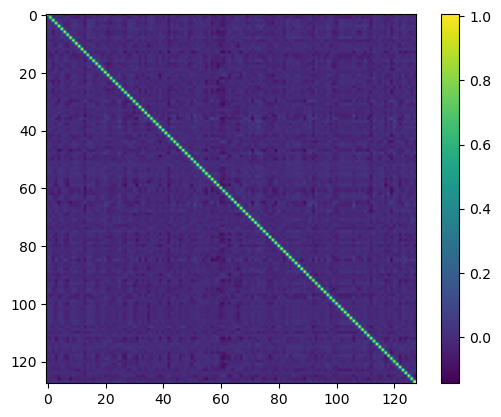

In [29]:
plt.imshow(model1.hidden.weight.detach().numpy())
plt.colorbar()

In [30]:
Wx = model1.input.weight.detach().numpy()
print("Norm of Wx: ",np.linalg.norm(Wx))

Norm of Wx:  5.988607
